## Setup and libraries

In [1]:
#Libraries

import pandas as pd
%matplotlib inline
import math
import seaborn as sns
import warnings
import numpy as np

import os
import gzip
import json
import pickle
import datetime
import pandas as pd

import pycountry_convert as pc
import pycountry

from pytrends.request import TrendReq

import xlrd as xlrd

from statsmodels.stats import diagnostic
from scipy import stats

from matplotlib import pyplot as plt

from helpers.helper_func import *

In [8]:
#Files paths

DATA_FOLDER = 'data/'

INTERVENTION_DATASET = DATA_FOLDER+"interventions.csv"
GLOBAL_MOBILITY = DATA_FOLDER+"Global_Mobility_Report.csv.gz"
TIME_SERIE_DATASET = DATA_FOLDER+"aggregated_timeseries.json.gz"
APPLE_MOBILITY = DATA_FOLDER+"applemobilitytrends-2020-04-20.csv.gz"
TOPICS_DATASET=DATA_FOLDER+"topics_linked.csv.xz"
COVID_CASES_GZ = DATA_FOLDER + "added_data/owid-covid-data.csv.gz"
AIR_QUALITY = DATA_FOLDER + "added_data/airquality_data_2020_concat.csv.gz"
DEGROWTH_WORLD_TREND = DATA_FOLDER + "added_data/DegrowthWorldTrend.csv"
ECOLOGY_WOLRD_TREND = DATA_FOLDER + "added_data/EcologyWorldTrend.csv"

In [12]:
interventions = pd.DataFrame(load_interventions("data/interventions.csv"))
events = pd.DataFrame.from_dict(interventions)
events.head(10)

,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja,en
1st case,2020-01-24,2020-02-27,2020-01-27,2020-01-31,2020-02-27,2020-02-26,2020-03-06,2020-01-31,2020-01-20,2020-01-31,2020-01-29,2020-01-16,NaT
1st death,2020-02-14,2020-03-12,2020-03-09,2020-02-22,2020-03-06,2020-02-26,2020-03-20,2020-03-11,2020-02-20,2020-02-13,2020-03-21,2020-02-13,NaT
School closure,2020-03-14,2020-03-13,2020-03-14,2020-03-05,2020-03-11,2020-03-13,2020-03-15,2020-03-18,2020-02-23,2020-03-12,2020-03-16,2020-02-27,NaT
Public events banned,2020-03-13,2020-03-12,2020-03-22,2020-03-09,2020-03-24,2020-03-12,2020-03-21,2020-03-12,NaT,2020-03-08,2020-03-16,2020-02-25,NaT
Lockdown,2020-03-17,2020-03-18,2020-03-22,2020-03-11,2020-03-23,2020-03-24,2020-03-21,NaT,NaT,2020-03-14,NaT,NaT,NaT
Mobility,2020-03-16,2020-03-11,2020-03-16,2020-03-11,2020-03-16,2020-03-11,2020-03-16,2020-03-11,2020-02-25,2020-03-16,2020-03-16,2020-03-31,2020-03-16
Normalcy,2020-07-02,2020-06-05,2020-07-10,2020-06-26,2020-05-29,2020-06-04,2020-05-02,2020-06-05,2020-04-15,NaT,2020-05-21,2020-06-14,2020-05-21


# Are we facing a climate change awareness pandemic ?

## How did the covid crisis impact people's lifestyle, mobility and localization ?

## Globally, did interest in ecology change during the covid pandemic?

## How did the severity of lockdown in a country have an impact on the disinterest toward ecological topics? (Does a more severe lockdown increases the observed trends?) 

## Which subjects within the theme of climate change gained or lost popularity during the lockdown period?

In [3]:
#Import climate change category dataset for different languages
#English
climate_change_cat_en = 'data/added_data/massviews-20180101-20220101_en.csv'
climate_change_cat_en = pd.read_csv(climate_change_cat_en)
climate_change_cat_en = climate_change_cat_en.append(climate_change_cat_en.sum(axis=0),ignore_index=True)

#German
climate_change_cat_de = 'data/added_data/massviews-20180101-20220101_de.csv'
climate_change_cat_de = pd.read_csv(climate_change_cat_de)
climate_change_cat_de = climate_change_cat_de.append(climate_change_cat_de.sum(axis=0),ignore_index=True)

#French
climate_change_cat_fr = 'data/added_data/massviews-20180101-20220101_fr.csv'
climate_change_cat_fr = pd.read_csv(climate_change_cat_fr)
climate_change_cat_fr = climate_change_cat_fr.append(climate_change_cat_fr.sum(axis=0),ignore_index=True)

#Italian
climate_change_cat_it = 'data/added_data/massviews-20180101-20220101_it.csv'
climate_change_cat_it = pd.read_csv(climate_change_cat_it)
climate_change_cat_it = climate_change_cat_it.append(climate_change_cat_it.sum(axis=0),ignore_index=True)

#Norwegian
climate_change_cat_no = 'data/added_data/massviews-20180101-20220101_no.csv'
climate_change_cat_no = pd.read_csv(climate_change_cat_no)
climate_change_cat_no = climate_change_cat_no.append(climate_change_cat_no.sum(axis=0),ignore_index=True)

#Danish
climate_change_cat_da = 'data/added_data/massviews-20180101-20220101_da.csv'
climate_change_cat_da = pd.read_csv(climate_change_cat_da)
climate_change_cat_da = climate_change_cat_da.append(climate_change_cat_da.sum(axis=0),ignore_index=True)

#Dutch
climate_change_cat_nl = 'data/added_data/massviews-20180101-20220101_nl.csv'
climate_change_cat_nl = pd.read_csv(climate_change_cat_nl)
climate_change_cat_nl = climate_change_cat_nl.append(climate_change_cat_nl.sum(axis=0),ignore_index=True)

#Serbian
climate_change_cat_sr = 'data/added_data/massviews-20180101-20220101_sr.csv'
climate_change_cat_sr = pd.read_csv(climate_change_cat_sr)
climate_change_cat_sr = climate_change_cat_sr.append(climate_change_cat_sr.sum(axis=0),ignore_index=True)

/tmp/ipykernel_209/2235326414.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate_change_cat_en = climate_change_cat_en.append(climate_change_cat_en.sum(axis=0),ignore_index=True)
/tmp/ipykernel_209/2235326414.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate_change_cat_de = climate_change_cat_de.append(climate_change_cat_de.sum(axis=0),ignore_index=True)
/tmp/ipykernel_209/2235326414.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate_change_cat_fr = climate_change_cat_fr.append(climate_change_cat_fr.sum(axis=0),ignore_index=True)
/tmp/ipykernel_209/2235326414.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [13]:
#Function to retrieve the differentially expressed themes

def differentially_expressed_themes( climate_change_cat_country, country_index, intervention_table, num_articles_graph, graph_bool, numb_returns):
    climate_change_cat_covid =  pd.DataFrame(climate_change_cat_country.set_index('Title').loc[:,interventions.loc['1st case',country_index].strftime('%Y-%m-%d'):interventions.loc['Normalcy',country_index].strftime('%Y-%m-%d')].copy().mean(axis=1),columns=['Average']).reset_index().iloc[:-1,:].nlargest(num_articles_graph,'Average')
    article = climate_change_cat_covid['Title'].values
    climate_change_cat_baseline = pd.DataFrame(climate_change_cat_country.set_index('Title').loc[:,'2018-01-01':interventions.loc['1st case',country_index].strftime('%Y-%m-%d')].copy().mean(axis=1),columns=['Average']).reset_index()
    climate_change_cat_baseline = climate_change_cat_baseline[climate_change_cat_baseline.Title.isin(article)]
    climate_change_cat_summer = pd.DataFrame(climate_change_cat_country.set_index('Title').loc[:,interventions.loc['Normalcy',country_index].strftime('%Y-%m-%d'):'2020-09-01'].copy().mean(axis=1),columns=['Average']).reset_index().iloc[:-1,:]
    climate_change_cat_summer = climate_change_cat_summer[climate_change_cat_summer.Title.isin(article)]

    climate_change_complete =  pd.DataFrame(columns=['Article', 'Baseline', 'Covid', 'Summer', 'BC_diff', 'BS_diff', 'CS_diff'])
    climate_change_complete.Article = climate_change_cat_baseline.Title
    climate_change_complete.Baseline = climate_change_cat_baseline.Average
    climate_change_complete.Covid = climate_change_cat_covid.Average
    climate_change_complete.Summer = climate_change_cat_summer.Average

    #Differences are computed in %
    climate_change_complete.BC_diff = (climate_change_cat_covid.Average - climate_change_cat_baseline.Average)/climate_change_cat_baseline.Average
    climate_change_complete.BS_diff = (climate_change_cat_summer.Average - climate_change_cat_baseline.Average)/climate_change_cat_baseline.Average
    climate_change_complete.CS_diff = (climate_change_cat_summer.Average - climate_change_cat_covid.Average)/climate_change_cat_covid.Average
    if graph_bool:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True, sharex=True,
                               gridspec_kw={"hspace": 0.15, "wspace": 0.05})
            
        for idx, article in enumerate(climate_change_complete['Article']):
            for idy, col in enumerate(["BC_diff", "BS_diff", "CS_diff"]):
                row = dict(climate_change_complete[climate_change_complete.Article == article].iloc[0])
                marker = "."
                axes[idy].scatter([row[col]], [article], color="black", marker=marker, zorder=2)
                axes[idy].plot([0, row[col]], [idx, idx], color= "r" if row[col] < 0 else "g", zorder=1)
                axes[idy].axhline(idx+0.5, lw=0.5, ls=":", color='black', alpha=0.5)
                
            _ = axes[idy].set_yticks(range(0, idx+1))
            _ = axes[idy].set_ylim([-0.5,idx+0.5])
            _ = axes[idy].set_xlim([-2, 8])

        for ax in axes:
            ax.axvline(0, zorder=0, color="black", ls="-", alpha=0.3)

        axes[0].set_title("Baseline vs Covid")
        axes[1].set_title("Baseline vs Summer")
        axes[2].set_title("Covid vs Summer")
        plt.show()
        to_return = climate_change_complete.nlargest(numb_returns, 'BC_diff')
        to_return['Country']=country_index
        
    return to_return

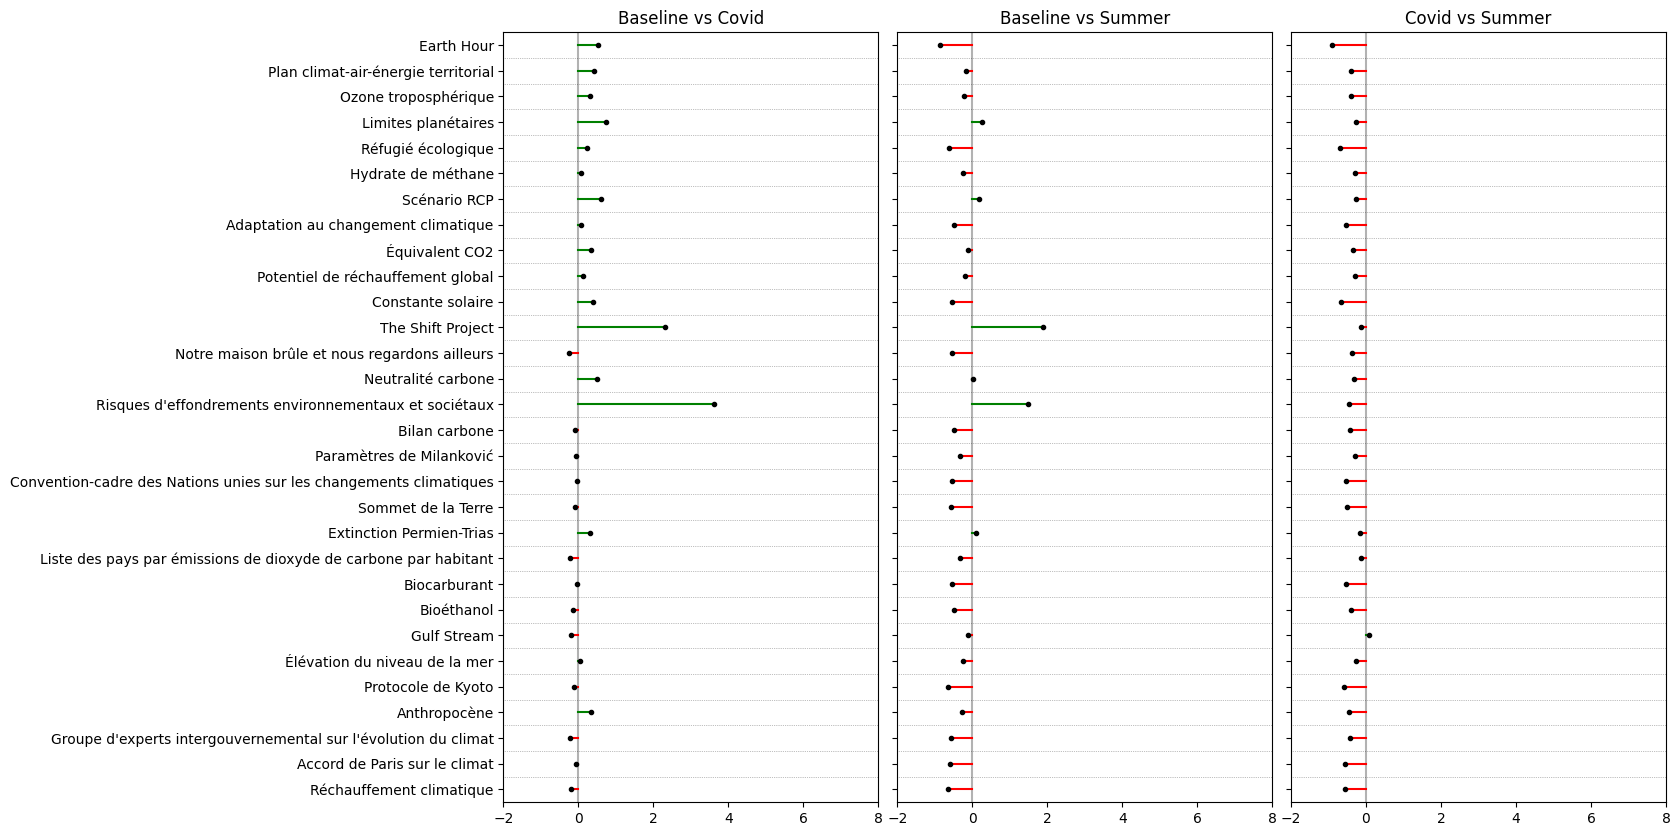

,Article,Baseline,Covid,Summer,BC_diff,BS_diff,CS_diff,Country
15,Risques d'effondrements environnementaux et so...,37.671088,173.627329,94.161290,3.609034,1.499564,-0.457682,fr
19,The Shift Project,30.291777,100.012422,87.112903,2.301636,1.875794,-0.128979,fr
28,Limites planétaires,24.209549,41.975155,30.693548,0.733826,0.267828,-0.268769,fr


In [15]:
differentially_expressed_themes(climate_change_cat_fr, 'fr', interventions,30, True, 3)

In [16]:
#Plot for same dates but before covid

In [5]:
#Create an interactive plotly to show each country of interest